In [1]:
import numpy as np
import sys
from scipy.ndimage import gaussian_filter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import copy
%matplotlib inline
sys.path.append('../../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/sim_phase_space/symmetric/results'
    tline_path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    print('CAREFUL! NO EXTERNAL SSD!')
    path = './results'
    tline_path = '../../det_sols_from_polynomial/res_files'

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [34]:
# per passar un mapa antic que estaba en csv a np array... pero al final no ho faig servir per N=35
if_name = 'results_old/q1_7_q2_10_phase_space_Galla_ic_N_Nbots_35.csv'
df_phase_space = pd.read_csv(if_name)
pi = df_phase_space['pi'].unique()
lamb = df_phase_space['lambda'].unique()
df_phase_space = df_phase_space.rename(columns={'lambda':'lamb'})
magnituds = ['f0', 'f1', 'f2', 'sdf0', 'sdf1', 'sdf2', 'Q', 'sdQ']
grid_fs = np.empty([8, len(pi), len(lamb)])
for i,p in enumerate(pi[0:1]):
    for j,l in enumerate(lamb[0:1]):
        for k,m in enumerate(magnituds):
            grid_fs[k,i,j] = float(df_phase_space.query('pi == @p & lamb == @l')[m])

xgrid_pi, ygrid_l = np.mgrid[pi[0]:pi[-1]:complex(0,len(pi)), lamb[0]:lamb[-1]:complex(0,len(lamb))]
xgrid_pi, ygrid_l = np.around(xgrid_pi,2), np.around(ygrid_l,2)
np.savez(f'results/q1_7.0_q2_10.0_phase_space_Galla_ic_N_Nbots_35.npz', x=xgrid_pi, y=ygrid_l, fs=grid_fs)
# mesh = np.load('results/q1_7.0_q2_10.0_phase_space_Galla_ic_N_Nbots_35.npz')
# fig, ax = plt.subplots()
# ax.pcolormesh(mesh['x'], mesh['y'], mesh['fs'][2], cmap='Reds', shading='nearest')

In [7]:
model = 'Galla'
q1, q2, ic, N = 7.0, 10.0, 'N', 100

mesh_file = f'q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz'
mesh = np.load(f'{path}/{mesh_file}')
# meshMOD = dict(mesh)

In [5]:
mesh['fs'][5][0,-82]

0.0720154799

### Fixing the fluctuating values

In [6]:
meshMOD = dict(mesh)

i = 0
vals0 = {
    0.11:[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    0.12:[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    0.13:[1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    0.14:[0.9398564,0.0,0.0601436,0.1184445329,0.0,0.1184445329,0.0601436,0.1184445329],
    0.15:[0.7346772,0.0,0.2653228,0.132277435,0.0,0.132277435,0.2653228,0.132277435],
    0.16:[0.650131,0.0,0.349869,0.0923182151,0.0,0.0923182151,0.349869,0.0923182151],
    0.17:[0.6011544,0.0,0.3988456,0.0759568783,0.0,0.0759568783,0.3988456,0.0759568783],
    0.18:[0.57007,0.0,0.42993,0.0751846733,0.0,0.0751846733,0.42993,0.0751846733],
    0.19:[0.5372408,0.0,0.4627592,0.0725963554,0.0,0.0725963554,0.4627592,0.0725963554],
    0.20:[0.5372408,0.0,0.4627592,0.0725963554,0.0,0.0725963554,0.4627592,0.0725963554]
}

# pis = 0.01, i.e. i = 1
i = 1
vals1 = {
    0.99:[0.10212,0.0003646,0.8975154,0.0305702731,0.0036634774,0.0307852036,0.8967862,0.0324750595],
    0.98:[0.1031166,0.0006258,0.8962576,0.0307073412,0.0053117205,0.03121369,0.895006,0.0347316565],
    0.97:[0.1044226,0.0006348,0.8949426,0.0309689943,0.004121775,0.0312385772,0.893673,0.0333365126],
    0.96:[0.1052358,0.0016162,0.893148,0.0310639405,0.0075263469,0.0319397886,0.8899156,0.03834565],
    0.95:[0.1062418,0.0012948,0.8924634,0.0310662829,0.0059702172,0.0316131248,0.8898738,0.0358022635],
    0.94:[0.1072886,0.0016648,0.8910466,0.0313812414,0.0080107703,0.032475077,0.887717,0.0397411866],
    0.93:[0.1085668,0.0018602,0.889573,0.0315461874,0.0080653367,0.0325631643,0.8858526,0.0397624581],
    0.92:[0.1098856,0.0025046,0.8876098,0.031936232,0.0095459404,0.0334386146,0.8826006,0.0431430977],
    0.91:[0.1108476,0.0027852,0.8863672,0.0318877653,0.0110518171,0.0338363527,0.8807968,0.0461940809]
}

i = 2
vals2 = {
    0.99:[0.102185,0.000357,0.897458,0.030397562,0.003527967,0.0306023894,0.896744,0.0321896639],
    0.98:[0.1032202,0.0009192,0.8958606,0.0305734576,0.0056705442,0.0310963562,0.8940222,0.0349915405]
}

i = 3
vals3 = {
    0.99:[0.1021428,0.0006742,0.897183,0.0303921768,0.0047815745,0.0307893246,0.8958346,0.0336713445],
    0.98:[0.103243,0.0014722,0.8952848,0.0305847176,0.0075016416,0.0315099808,0.8923404,0.0380188707]
}

i = 4
vals4 = {
    0.99:[0.1022416,0.0008668,0.8968916,0.0304348358,0.005037525,0.0308496005,0.895158,0.0339822753],
    0.98:[0.1032708,0.0020692,0.89466,0.0305969585,0.0090190028,0.0318679212,0.8905216,0.040772539],
    0.97:[0.1043182,0.0030378,0.892644,0.0307945961,0.0104045073,0.0324737627,0.8865684,0.0437783522]
}

i=5
vals5 = {
    0.99:[0.1022396,0.0009966,0.8967638,0.0304194049,0.0053100648,0.0308878133,0.8947706,0.0343608989]
}

i = 6
vals6 = {
    0.99:[0.1021756,0.0011334,0.896691,0.0303934658,0.0057269018,0.0309154414,0.8944242,0.034879112],
    0.96:[0.1052344,0.0059188,0.8888468,0.030936662,0.0139922767,0.0339484628,0.8770092,0.0521348551]
}

i = 8
vals8 = {
    0.99:[0.1021092,0.001868,0.8960228,0.0304248463,0.0080273642,0.0314249245,0.8922868,0.0387022809]
}

i = 12
vals12 = {0.99:[0.1020672,0.0029844,0.8949484,0.0304208922,0.0104719318,0.0321983437,0.8889796,0.0437870618]}

i = [0,1,2,3,4,5,6,8,12]
vals = [vals0, vals1, vals2, vals3, vals4, vals5, vals6, vals8, vals12]

for i,valsI in zip(i,vals):
    for l,lvals in valsI.items():
        j = int((l- 1.0)*100)-1
        for k in range(8):
            meshMOD['fs'][k][i,j] = lvals[k]

np.savez(f'{path}/q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz', x=meshMOD['x'], y=meshMOD['y'], fs=meshMOD['fs'])


0.132277435


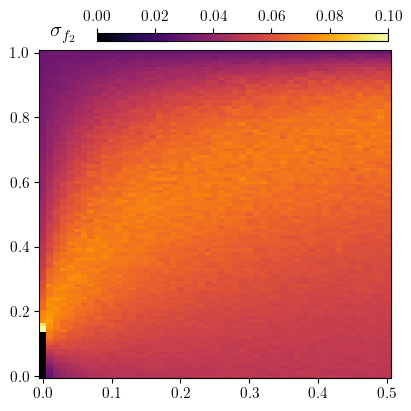

In [11]:
# fig, ax = plt.subplots(constrained_layout=True)

latexFont(titlesize=11, ticklabelssize=11, labelsize=13)
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

ax.set(xlim=(-0.005, 0.505), ylim=(-0.005, 1.01))
fig.text(0.11, 0.92, '$\sigma_{f_2}$')

indexi, indexj = 6, -6
indexi = 0
if indexi:
    z = mesh['fs'][5][indexi:, :indexj]
else:
    z = mesh['fs'][5]

vmax = np.max(z)
print(vmax)

# z = gaussian_filter(z, sigma=0.2)

cmap = copy.copy(matplotlib.colormaps['inferno'])
cmap.set_bad(cmap.colors[0])

logmap = False
if logmap:
    vmin = np.min(z[z>0])
    vmin = 0.05
    vmax = 0.1
    if indexi:
        im = ax.pcolormesh(mesh['x'][indexi:, :indexj], mesh['y'][indexi:, :indexj], z, cmap=cmap, shading='nearest', norm = LogNorm(vmin, vmax), rasterized=True)
    else:
        im = ax.pcolormesh(mesh['x'], mesh['y'], z, cmap=cmap, shading='nearest', norm = LogNorm(vmin, vmax), rasterized=True)
else:
    vmin = np.min(z)
    vmax = 0.10
    if indexi:
        im = ax.pcolormesh(mesh['x'][indexi:, :indexj], mesh['y'][indexi:, :indexj], z, cmap=cmap, shading='nearest', vmin=vmin, vmax=vmax, rasterized=True)
    else:
        im = ax.pcolormesh(mesh['x'], mesh['y'], z, cmap=cmap, shading='nearest', vmin=vmin, vmax=vmax, rasterized=True)

# fig.colorbar(im)
fig.colorbar(im, ax=ax, location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))

# fig.savefig(f'cmap_sym_sdf2_q1_{q1}_q2_{q2}_N_{N}_gaussianFilter_adjusted_linScale.png')
# fig.savefig(f'cmap_sym_sdf2_q1_{q1}_q2_{q2}_N_{N}_gaussianFilter_adjusted_linScale.pdf')
# fig.savefig(f'cmap_sym_sdf2_q1_{q1}_q2_{q2}_N_{N}_gaussianFilter.png')
# fig.savefig(f'cmap_sym_sdf2_q1_{q1}_q2_{q2}_N_{N}.png')
# fig.savefig(f'cmap_sym_sdf2_q1_{q1}_q2_{q2}_N_{N}_adjusted_linscale.png')

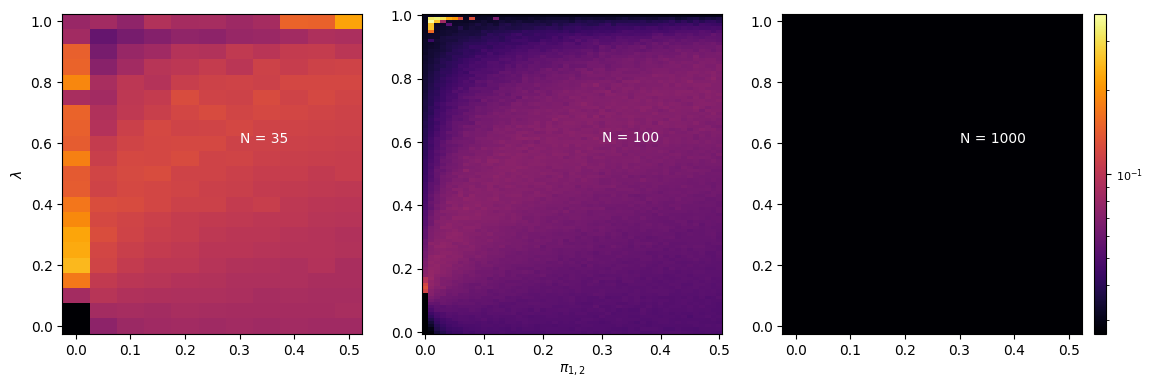

In [56]:
q1, q2, ic = 7.0, 10.0, 'N'
model = 'Galla'

fig, ax = plt.subplots(1,3, figsize=(12,4))

# search vmin, vmax:
# vmin, vmax = None, None
vmins, vmaxs = [], []
for N in [35, 100, 1000]:
    mesh_file = f'q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz'
    mesh = np.load(f'{path}/{mesh_file}')
    vminN, vmaxN = np.min(mesh['fs'][5]), np.max(mesh['fs'][5])
    # vmin = vminN if vmin == None or vminN < vmin else vminN
    # vmax = vmaxN if vmax == None or vmaxN > vmax else vminN
    vmins.append(np.min(mesh['fs'][5])), vmaxs.append(np.max(mesh['fs'][5]))

vmin, vmax = min(vmins), max(vmaxs)
# print(vmin, vmax)

# vmin, vmax = 0.01, 0.1


logmap = True

cmap = copy.copy(matplotlib.colormaps['inferno'])
cmap.set_bad(cmap.colors[0])
for i,N in enumerate([35, 100, 1000]):
    mesh_file = f'q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz'
    mesh = np.load(f'{path}/{mesh_file}')
    if logmap:
        if vmin == 0.0:
            z = mesh['fs'][5]
            vmin = np.min(z[z>0])
        im = ax[i].pcolormesh(mesh['x'], mesh['y'], mesh['fs'][5], cmap=cmap, shading='nearest', norm = LogNorm(vmin, vmax))
    else:
        # vmin, vmax = 0.0, 0.1
        im = ax[i].pcolormesh(mesh['x'], mesh['y'], mesh['fs'][5], cmap='magma', shading='nearest', vmin=vmin, vmax=vmax)
    ax[i].text(0.3, 0.6, f'N = {N}', color='xkcd:white')
ax[1].set_xlabel('$\pi_{1,2}$')
ax[0].set_ylabel('$\lambda$')

# Make some room for the colorbar
fig.subplots_adjust(left=0.07, right=0.92, bottom=0.125, top=0.925)
# Add the colorbar outside...
box = ax[-1].get_position()
pad, width = 0.01, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
cb = fig.colorbar(im, cax=cax)
cb.ax.tick_params(labelsize=8)

fig.savefig(f'cmaps_sym_sdf2_varN_q1_{q1}_q2_{q2}.png')


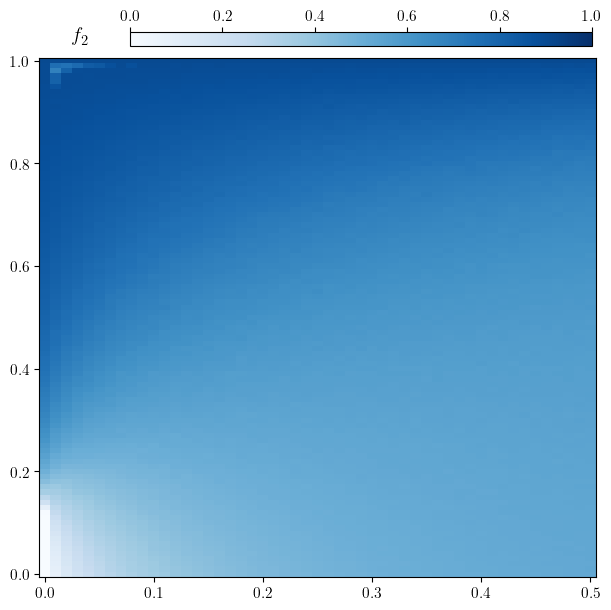

In [74]:
# fig, ax = plt.subplots(constrained_layout=True)

latexFont(titlesize=11, ticklabelssize=11, labelsize=13)
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

ax.set(xlim=(-0.005, 0.505), ylim=(-0.005, 1.005))
fig.text(0.11, 0.94, '$f_2$')



# z = gaussian_filter(z, sigma=0.2)
im = ax.pcolormesh(mesh['x'], mesh['y'], mesh['fs'][2], cmap='Blues', vmin=0, vmax=1, shading='nearest', rasterized=True)

# fig.colorbar(im)
fig.colorbar(im, ax=ax, location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
fig.savefig(f'map_sym_f2_q1_{q1}_q2_{q2}_N_{N}.png')